In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/weather.csv')
df.head(2)

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,11.51,428.0


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [5]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [6]:
show = df[['OT']]
# 使用STL进行分解
period = 24
stl = STL(show, seasonal=13, period=period)
result = stl.fit()

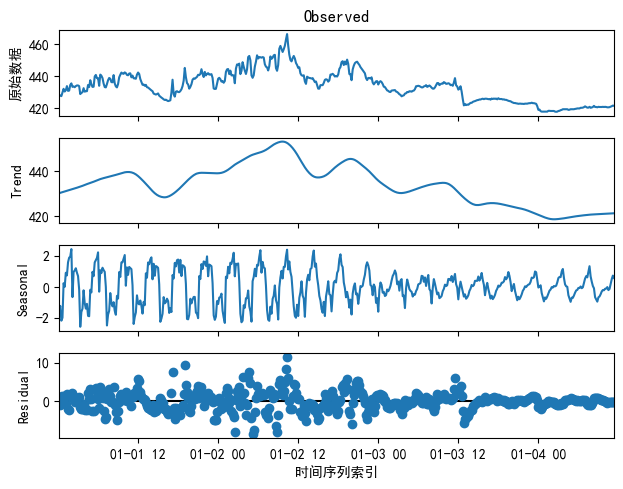

In [10]:
# 数据展示
show = df[['OT']].iloc[0:500]
# 使用STL进行分解
period = 24
stl = STL(show, seasonal=13, period=period)
res = stl.fit()
# 设置字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号正常显示
# 绘制STL分解图，并添加标题
fig = res.plot()

# 获取子图的Axes对象
axes = fig.get_axes()

# 设置每个子图的横纵坐标标签
axes[0].set_ylabel('原始数据')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

# 设置共享的x轴标签
axes[3].set_xlabel('时间序列索引')
plt.show()

In [7]:
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

In [8]:
# 计算相关性
# 计算相关性
correlations = df.corr()['OT'].drop('OT')

In [9]:
correlations = pd.DataFrame(correlations)
correlations.to_csv('output/feature_weather.csv')

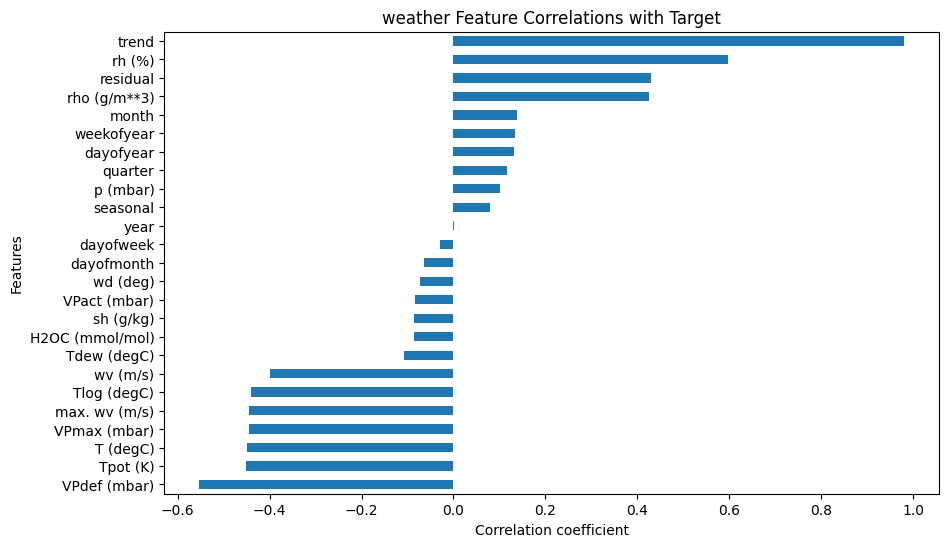

In [8]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh')
plt.title('weather Feature Correlations with Target')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()


In [21]:
from pyecharts.charts import Bar
from pyecharts import options as opts
correlations = correlations.sort_values()
# 提取变量名称和对应的相关性值
variables = correlations.index.tolist()
correlation_values = correlations.values.tolist()

# 创建条形图
bar = (
    Bar()
    .add_xaxis(variables)
    .add_yaxis("相关性", correlation_values,label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各特征与目标维度的相关性"),
        xaxis_opts=opts.AxisOpts(axislabel_opts={"rotate": 45}),  # 旋转x轴标签以防止重叠
        yaxis_opts=opts.AxisOpts(name="相关性"),
        datazoom_opts=opts.DataZoomOpts()  # 添加数据缩放工具
    )
)

# 渲染图表
bar.render("correlations.html")

'd:\\codefiled\\Graduation_Design\\models\\data\\feature\\correlations.html'

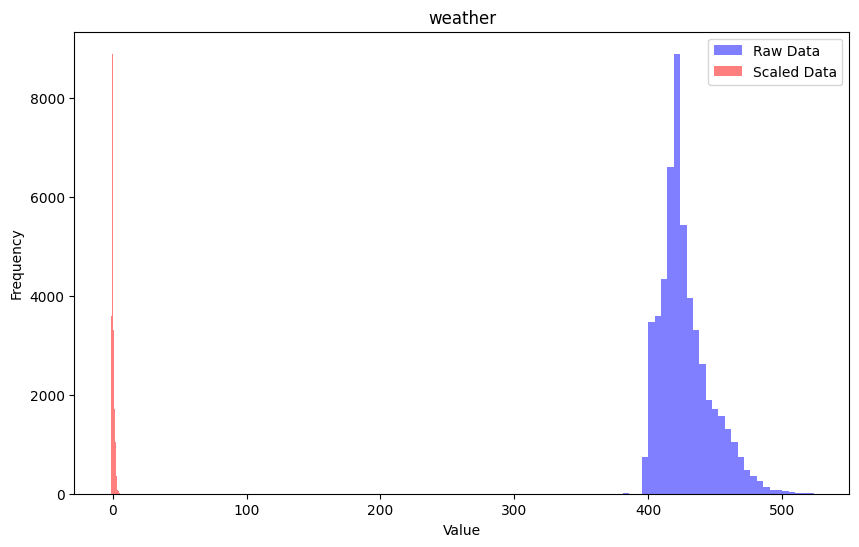

In [16]:
# 示例数据：标准化前的数据和标准化后的数据
data_raw = df['OT']
data_scaled = (data_raw - np.mean(data_raw)) / np.std(data_raw)

# 绘制直方图
plt.figure(figsize=(10, 6))

# 绘制标准化前的数据的直方图
plt.hist(data_raw, bins=30, color='blue', alpha=0.5, label='Raw Data')

# 绘制标准化后的数据的直方图
plt.hist(data_scaled, bins=30, color='red', alpha=0.5, label='Scaled Data')

# 添加图例和标题
plt.legend()
plt.title('weather')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [31]:
df.to_csv('feature/weather.csv',index=False)